Análise de Componentes Principais (PCA) - Técnica de redução de dimensionalidade dentro da Ciência de Dados.

   Componente Principal 1  Componente Principal 2  Componente Principal 3  \
0               -2.264703                0.480027               -0.127706   
1               -2.080961               -0.674134               -0.234609   
2               -2.364229               -0.341908                0.044201   
3               -2.299384               -0.597395                0.091290   
4               -2.389842                0.646835                0.015738   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  


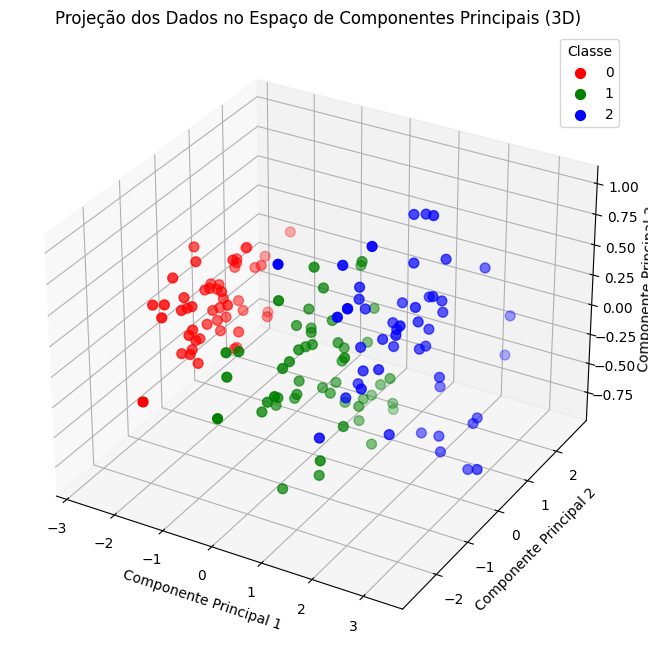

In [3]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Carregar o conjunto de dados Iris
iris = load_iris()
data = iris.data
target = iris.target

# Padronizar os dados (importante para o PCA)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Inicializar o modelo PCA com 3 componentes principais
pca = PCA(n_components=3)

# Ajustar o modelo aos dados padronizados e obter os componentes principais
principal_components = pca.fit_transform(data_standardized)

# Criar um DataFrame para visualização
df_pca = pd.DataFrame(data=principal_components, columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3'])
df_pca['Target'] = target

# Visualizar o DataFrame resultante
print(df_pca.head())

# Plotar os dados no novo espaço de características definido pelos componentes principais
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = np.unique(target)
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    ax.scatter(df_pca.loc[indices_to_keep, 'Componente Principal 1'],
               df_pca.loc[indices_to_keep, 'Componente Principal 2'],
               df_pca.loc[indices_to_keep, 'Componente Principal 3'],
               c=color, s=50)

ax.set_title('Projeção dos Dados no Espaço de Componentes Principais (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend(targets, title='Classe')

plt.show()
